<a href="https://colab.research.google.com/github/leticiafcarvalho/DesafioReducaoDimensionalidade/blob/main/Redu_o_de_Dimensionalidade_em_Imagens_para_Redes_Neurais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
from PIL import Image
from google.colab import drive
drive.mount('/content/drive')
from IPython.display import display

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
# Função para converter uma imagem colorida para tons de cinza
def converter_para_cinza(imagem):
    largura, altura = imagem.size
    imagem_cinza = Image.new("L", (largura, altura))  # Criar nova imagem em escala de cinza

    for y in range(altura):
        for x in range(largura):
            # Obter os valores RGB do pixel
            r, g, b = imagem.getpixel((x, y))
            # Aplicar a fórmula para conversão para tons de cinza
            valor_cinza = int(0.299 * r + 0.587 * g + 0.114 * b)
            # Atribuir o valor calculado ao pixel da imagem cinza
            imagem_cinza.putpixel((x, y), valor_cinza)

    return imagem_cinza

In [38]:
 # Função para binarizar uma imagem (converter para preto e branco)
def binarizar_imagem(imagem_cinza, limiar=127):
    largura, altura = imagem_cinza.size
    imagem_binaria = Image.new("1", (largura, altura))  # Criar nova imagem binária (1 bit por pixel)

    for y in range(altura):
        for x in range(largura):
            # Obter o valor de cinza do pixel
            valor_cinza = imagem_cinza.getpixel((x, y))
            # Verificar se está acima ou abaixo do limiar
            valor_binario = 1 if valor_cinza > limiar else 0  # 1 para branco, 0 para preto
            # Atribuir o valor binário ao pixel da imagem binária
            imagem_binaria.putpixel((x, y), valor_binario)

    return imagem_binaria

In [39]:
# Carregar a imagem original
caminho_imagem = "/content/drive/My Drive/maltese-1123016_1280.jpg"  # Substitua pelo caminho correto
imagem_original = Image.open(caminho_imagem)

In [40]:
# Converter para tons de cinza
imagem_cinza = converter_para_cinza(imagem_original)

In [41]:
# Binarizar a imagem
imagem_binaria = binarizar_imagem(imagem_cinza)

In [42]:
# Salvar as imagens processadas
imagem_cinza.save("imagem_cinza.png")
imagem_binaria.save("imagem_binaria.png")

In [43]:
# Exibir as imagens processadas
imagem_original.show(title="Imagem Original")
imagem_cinza.show(title="Imagem em Tons de Cinza")
imagem_binaria.show(title="Imagem Binarizada")

Imagem Original:


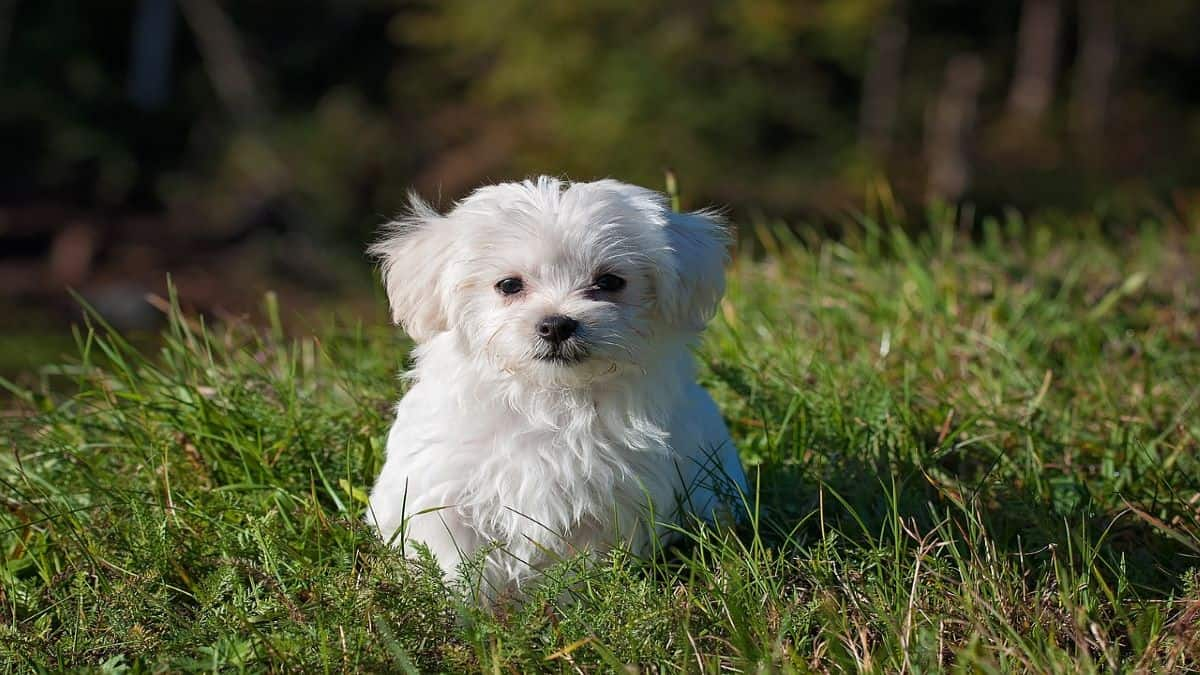

Imagem em Tons de Cinza:


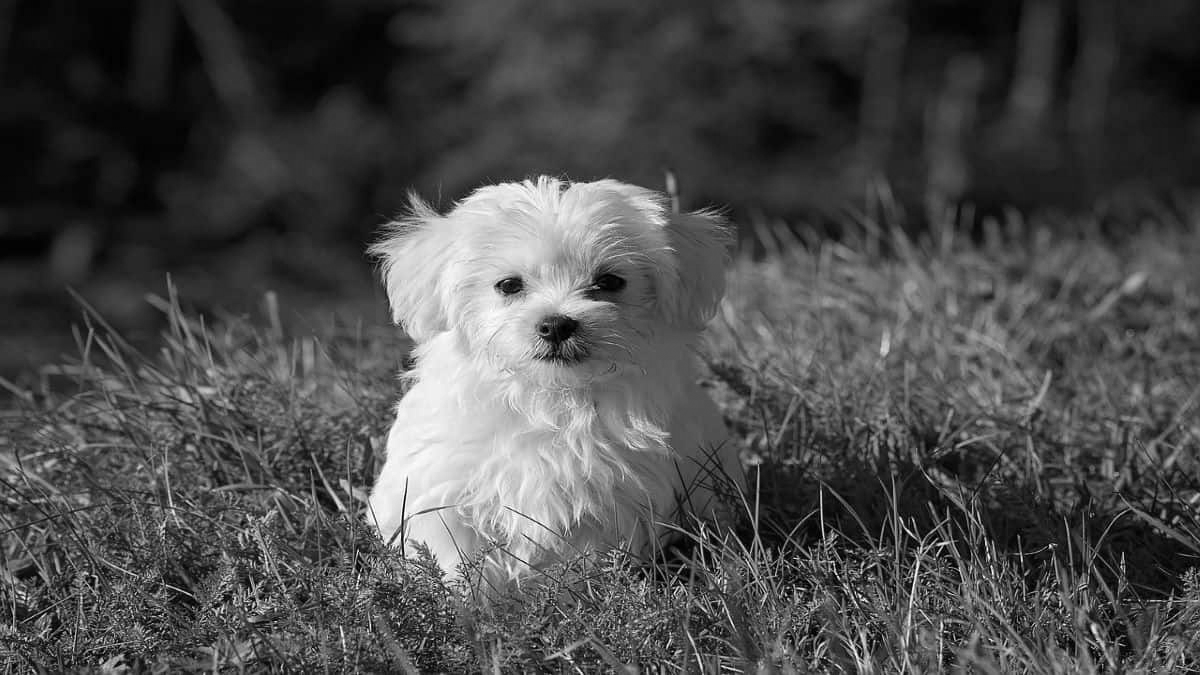

Imagem Binarizada:


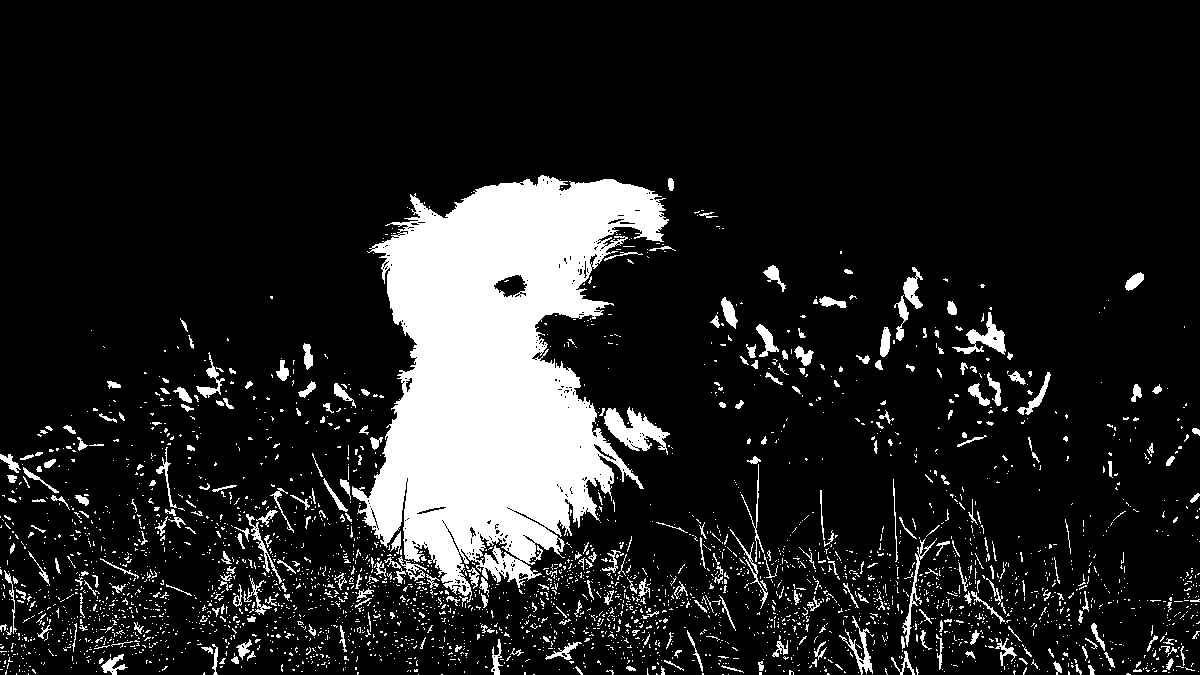

In [44]:
# Exibir as imagens no notebook
print("Imagem Original:")
display(imagem_original)

print("Imagem em Tons de Cinza:")
display(imagem_cinza)

print("Imagem Binarizada:")
display(imagem_binaria)